In [26]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.width = 1000

In [46]:
# Read loan.csv

loan_df = pd.read_csv('loan.csv', low_memory=False)

loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [28]:
#inspect the dataframe
print('Info: ',loan_df.info())
print('Shape: ',loan_df.shape)
print('Columns: ',loan_df.columns)
print('Head: ',loan_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [29]:
# Check For Columns with more than 75% missing values
threshold = len(loan_df) * 0.75

columns_with_missing_values = loan_df.isnull().sum()
columns_to_drop = columns_with_missing_values[columns_with_missing_values > threshold].index.tolist()

#Payment plan column has same value for all rows hence removing it as well
print('Payment plan columns has only on single value',loan_df['pymnt_plan'].value_counts())

columns_to_drop.append('pymnt_plan')
columns_to_drop.append('initial_list_status') # unique        1, top           f
columns_to_drop.append('total_pymnt_inv')
columns_to_drop.append('out_prncp_inv') 
columns_to_drop.append('collections_12_mths_ex_med') # only contains 0 or null
columns_to_drop.append('policy_code') # unique        1, top           1
columns_to_drop.append('application_type') # only contains Individual

# contains null or single value like 0
columns_to_drop.append('acc_now_delinq')
columns_to_drop.append('chargeoff_within_12_mths')
#columns_to_drop.append('pub_rec_bankruptcies')
columns_to_drop.append('tax_liens')



print('Columns to be dropped: ',columns_to_drop)
print('Number of Columns to be dropped',len(columns_to_drop))
print('Number of Columns before dropping: ',loan_df.shape[1])

loan_df_ct1 = loan_df.drop(columns=columns_to_drop)

print('Number of Columns after dropping: ',loan_df_ct1.shape[1])

# Set the option to display all info columns
pd.set_option('display.max_info_columns', 500)

print('Info after dropping: ',loan_df_ct1.info())





Payment plan columns has only on single value pymnt_plan
n    39717
Name: count, dtype: int64
Columns to be dropped:  ['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'n

<h1>Some Interesting Insights Not Related to The problem statement</h1>

<h2>Univariate Analysis</h2>
<h3>Column: earliest_cr_line </h3>
    <p>
    <h4>This column gives the start mon-year of credit relation of customer with financier</h4>
        It is observed that customer relations peaked in 1999-2000 and declined from there on.
        Also there is some invalid data with date like 2046, 2050...2068
    </p>




    Column  Count
0     1998    370
1     1999    366
2     1998    348
3     2000    346
4     1997    329
5     2000    320
6     1999    319
7     2000    306
8     1998    305
9     1997    298
10    1995    294
11    1999    289
12    2000    284
13    2000    284
14    2000    273
15    1996    272
16    1996    272
17    2000    270
18    2001    267
19    2001    266


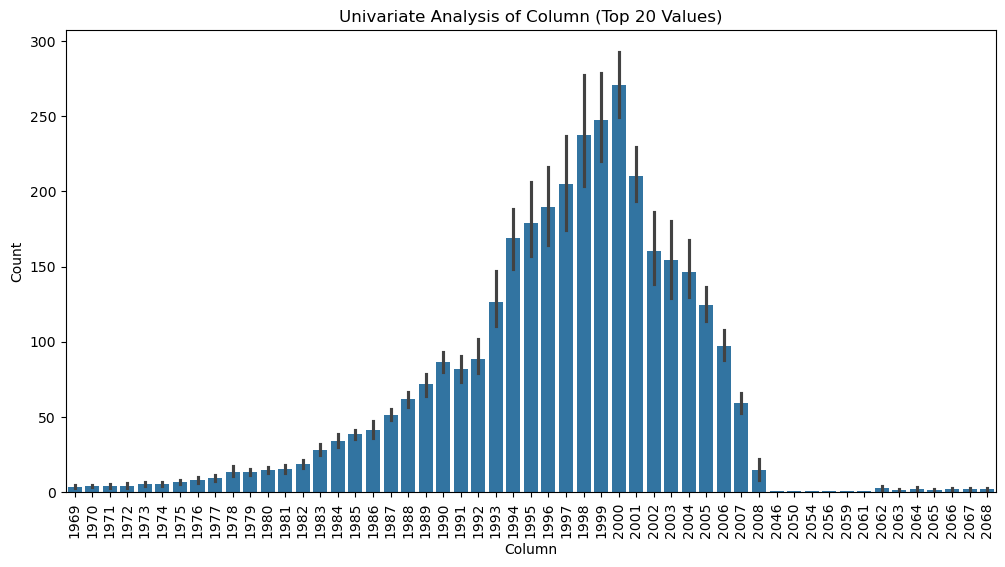

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade  ... total_rec_int total_rec_late_fee   recoveries  collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d delinq_amnt pub_rec_bankruptcies earliest_cr_line_yr
1576   1048395    1279722      21000        21000     20875.000000   36 months    7.51%       653.33     A        A3  ...       2047.25           0.000000     0.000000                   0.0000       Sep-13        10000.95             Sep-13           0                  0.0                2062
1764   1042802    1272895       5500         5500      5500.000000   36 months    7.51%       171.11     A        A3  ...         38.32           0.000000     0.000000                   0.0000       Feb-12          539.21             Sep-15           0                  0.0                2068
2792   1031659    1249389       5200         5200      5200.000000   60 months    8.90%       107.70     A        A5  

In [30]:

loan_df_ct1['earliest_cr_line'].value_counts()

value_counts = loan_df_ct1['earliest_cr_line'].value_counts().reset_index()
value_counts.columns = ['Column', 'Count']
value_counts['Column'] = pd.to_datetime(value_counts['Column'], format='%b-%y').dt.year


top_n = 20
top_values = value_counts.head(top_n)
print(top_values)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Column', y='Count', data=value_counts)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.title('Univariate Analysis of Column (Top 20 Values)')
plt.xlabel('Column')
plt.ylabel('Count')
plt.show()

loan_df_ct1['earliest_cr_line_yr'] = pd.to_datetime(loan_df_ct1['earliest_cr_line'], format='%b-%y').dt.year
print(loan_df_ct1[loan_df_ct1['earliest_cr_line_yr'] > 2011])

      Column  Count
0         0%    977
1      0.20%     63
2        63%     62
3     40.70%     58
4     66.70%     58
...      ...    ...
1084  25.74%      1
1085  47.36%      1
1086  24.65%      1
1087  10.61%      1
1088   7.28%      1

[1089 rows x 2 columns]


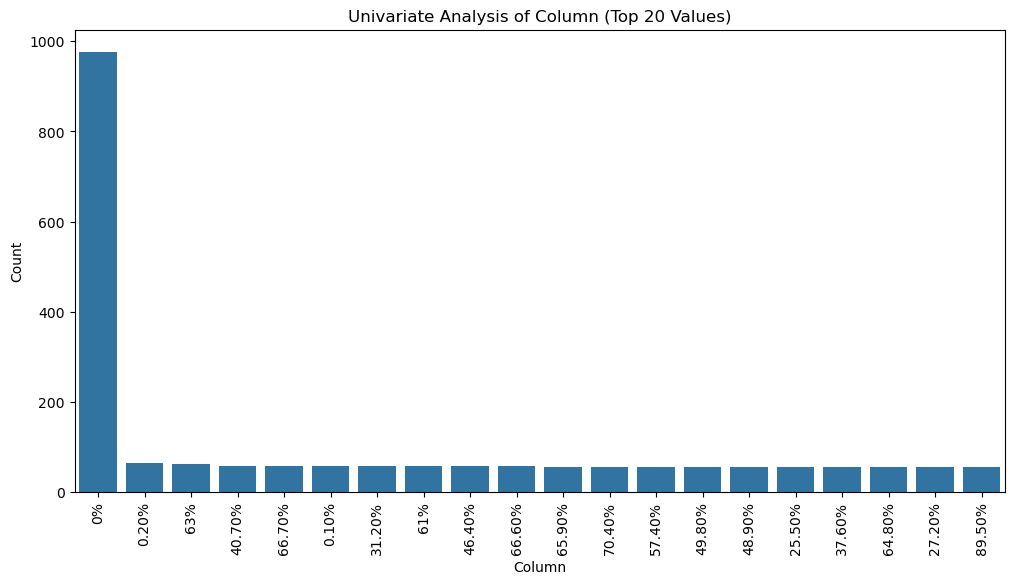

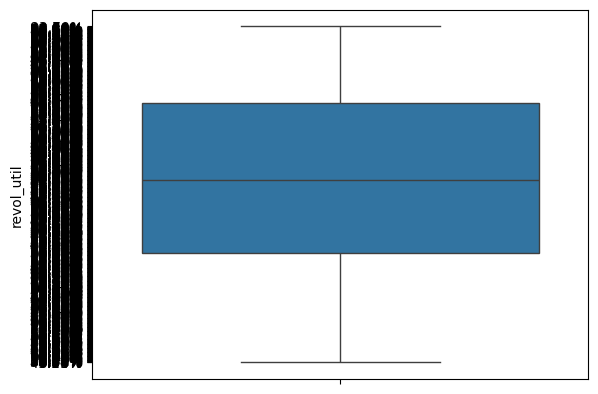

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [31]:


columnName = 'revol_util'

# loan_df_ct1[columnName].value_counts()

value_counts = loan_df_ct1[columnName].value_counts().reset_index()
#value_counts = loan_df_ct1[loan_df_ct1[columnName] > 1000][columnName].value_counts().reset_index()
value_counts.columns = ['Column', 'Count']
#value_counts['Column'] = pd.to_datetime(value_counts['Column'], format='%b-%y').dt.year

print(value_counts)

top_n = 20
top_values = value_counts.head(top_n)
top_values

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Column', y='Count', data=top_values)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.title('Univariate Analysis of Column (Top 20 Values)')
plt.xlabel('Column')
plt.ylabel('Count')
plt.show()

sns.boxplot(loan_df_ct1[columnName])
plt.show()

loan_df_ct1[columnName].describe()




In [32]:

final_df = loan_df_ct1[['member_id','loan_amnt','term','int_rate','installment','grade','sub_grade', 'emp_title','home_ownership', 'emp_length', 'annual_inc', 'verification_status', 'purpose', 'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'addr_state', 'dti', 'inq_last_6mths', 'total_pymnt', 'total_rec_prncp', 'earliest_cr_line','pub_rec_bankruptcies']]


# fill null values 
final_df['revol_util'] = final_df['revol_util'].apply(lambda x: str(x).replace('%','')).astype(float)
revol_util_mean = final_df['revol_util'].mean()
final_df['revol_util'].fillna(revol_util_mean, inplace=True)

final_df['emp_length_int'] = (final_df['emp_length'].apply(lambda x: str(x).replace(' years','').replace(' year','').replace('n/a','0').replace('< 1','0.5').replace('+','')).astype(float)).fillna(2.0)

# Convert 'term' to numeric
final_df['term'] = final_df['term'].apply(lambda x: int(x.strip().replace(' months','')))

print(final_df.info())

#convert int_rate to float
final_df['int_rate'] = final_df['int_rate'].apply(lambda x: str(x).replace('%','')).astype(float)

# Target variables
# ['delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'recoveries', 'collection_recovery_fee']




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   term                     39717 non-null  int64  
 3   int_rate                 39717 non-null  object 
 4   installment              39717 non-null  float64
 5   grade                    39717 non-null  object 
 6   sub_grade                39717 non-null  object 
 7   emp_title                37258 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  purpose                  39717 non-null  object 
 13  delinq_2yrs              39717 non-null  int64  
 14  mths_since_last_delinq

/var/folders/kr/2dz_dl891y34ggnynv903xd80000gn/T/ipykernel_65104/1140889071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['revol_util'] = final_df['revol_util'].apply(lambda x: str(x).replace('%','')).astype(float)
/var/folders/kr/2dz_dl891y34ggnynv903xd80000gn/T/ipykernel_65104/1140889071.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) 

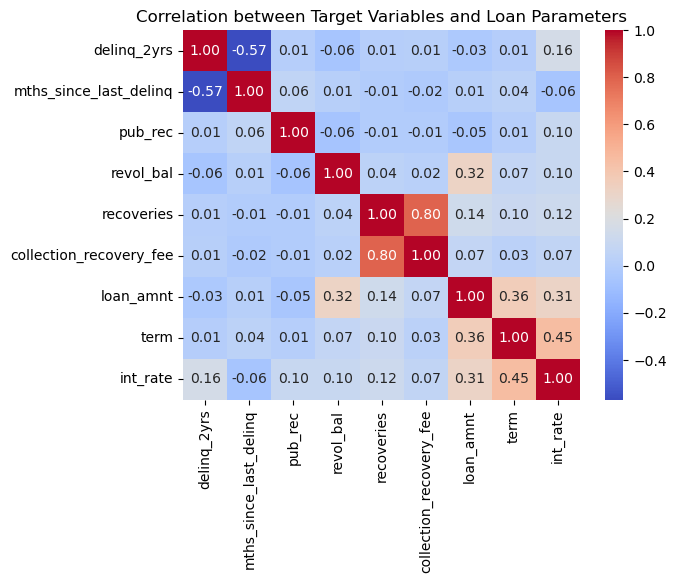

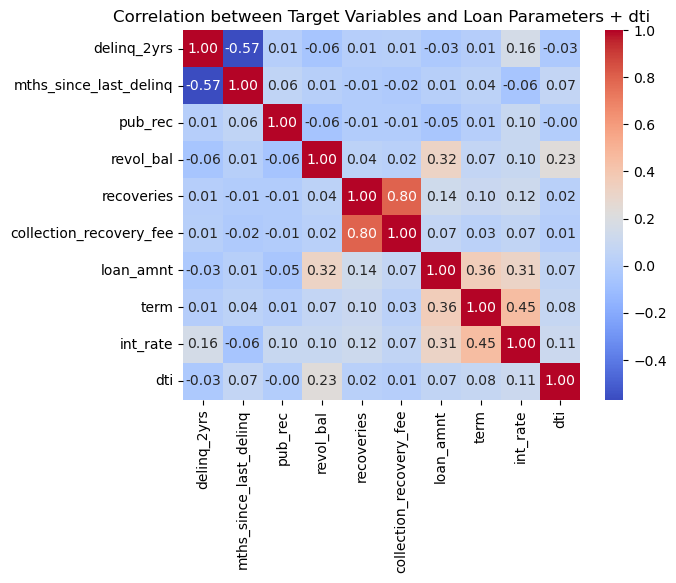

In [33]:
# Target variables
# ['delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'recoveries', 'collection_recovery_fee']

# correlation of target vars with loan parameters(amount, int_rate, term)
target2loanCorr = final_df[['delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'recoveries', 'collection_recovery_fee','loan_amnt','term','int_rate']].corr()

sns.heatmap(target2loanCorr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Target Variables and Loan Parameters')
plt.show()

#No interesting observations
#Only things observed is a slight positive correlation between int_rate and revol_bal and loan_amnt

# adding dti to the mix
target2loanCorr = final_df[['delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'recoveries', 'collection_recovery_fee','loan_amnt','term','int_rate','dti']].corr()
sns.heatmap(target2loanCorr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Target Variables and Loan Parameters + dti')
plt.show()

In [34]:
# bivariate analysis between target variables and other categorical variables
categorical_vars = ['term','grade','sub_grade', 'emp_title','home_ownership', 'emp_length', 'verification_status', 'purpose', 'addr_state']
target_vars = ['delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'recoveries', 'collection_recovery_fee']


columnsForCategoricalAnalysis = categorical_vars + target_vars
final_df[columnsForCategoricalAnalysis]


,term,grade,sub_grade,emp_title,home_ownership,emp_length,verification_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,pub_rec,revol_bal,recoveries,collection_recovery_fee
0,36,B,B2,NaN,RENT,10+ years,Verified,credit_card,AZ,0,NaN,0,13648,0.00,0.00
1,60,C,C4,Ryder,RENT,< 1 year,Source Verified,car,GA,0,NaN,0,1687,117.08,1.11
2,36,C,C5,NaN,RENT,10+ years,Not Verified,small_business,IL,0,NaN,0,2956,0.00,0.00
3,36,C,C1,AIR RESOURCES BOARD,RENT,10+ years,Source Verified,other,CA,0,35.0,0,5598,0.00,0.00
4,60,B,B5,University Medical Group,RENT,1 year,Source Verified,other,OR,0,38.0,0,27783,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36,A,A4,FiSite Research,MORTGAGE,4 years,Not Verified,home_improvement,CO,0,0.0,0,7274,0.00,0.00
39713,36,C,C1,"Squarewave Solutions, Ltd.",RENT,3 years,Not Verified,credit_card,NC,1,5.0,0,8847,0.00,0.00
39714,36,A,A4,NaN,MORTGAGE,< 1 year,Not Verified,debt_consolidation,MA,0,0.0,0,9698,0.00,0.00
39715,36,A,A2,NaN,MORTGAGE,< 1 year,Not Verified,other,MD,0,0.0,0,85607,0.00,0.00


/var/folders/kr/2dz_dl891y34ggnynv903xd80000gn/T/ipykernel_65104/1429424105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['loan_status'] = loan_df['loan_status']
/var/folders/kr/2dz_dl891y34ggnynv903xd80000gn/T/ipykernel_65104/1429424105.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargedOffDf['annual_inc'] = chargedOffDf[chargedOffDf['annual_inc'] < 60000]['annual_inc']


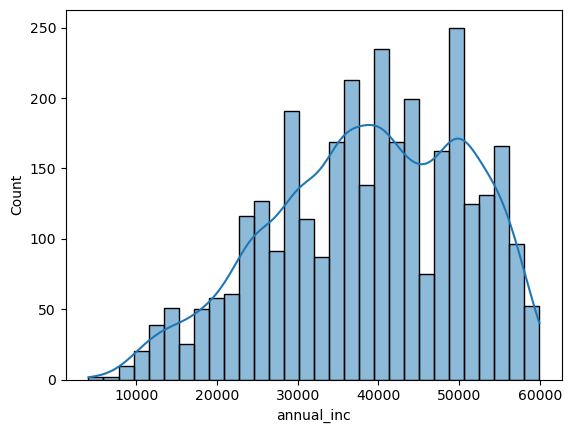

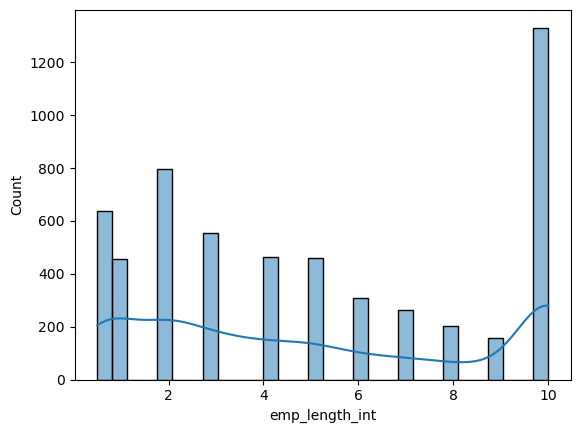

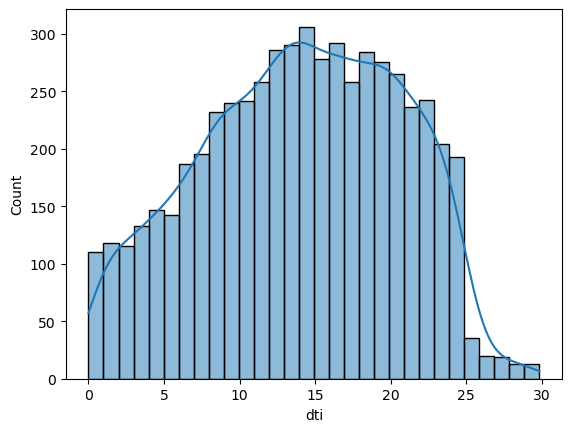

In [35]:
# Analyse on the basis of loan_status
final_df['loan_status'] = loan_df['loan_status']

# correlation of quant parameters with loan_status = charged off
quant_params = ['loan_amnt','term','int_rate','installment','annual_inc','dti', 'revol_bal', 'emp_length_int', 'open_acc', 'total_acc', 'revol_util', 'delinq_2yrs']
chargedOffDf = final_df[final_df['loan_status'] == 'Charged Off']


# outlier removal for annual_inc
chargedOffDf['annual_inc'] = chargedOffDf[chargedOffDf['annual_inc'] < 60000]['annual_inc']

# find outlier in chargedOffDf for annual_inc
# plt.figure(figsize=(10,5))
# plt.subplot(1, 2, 1)
# sns.boxplot(chargedOffDf['annual_inc'])
# plt.subplot(1, 2, 2)
# sns.histplot(chargedOffDf['annual_inc'], bins=30, kde=True)
# plt.show()


# plt.figure(figsize=(10,5))
# plt.subplot(1, 2, 1)
# sns.boxplot(chargedOffDf['emp_length_int'])
# plt.subplot(1, 2, 2)
# sns.histplot(chargedOffDf['emp_length_int'], bins=30, kde=True)
# plt.show()

# distibution of values in chargedOffDf for count of values

#Observervation: most charge offs happen for loan amount between income range 30000 - 50000
# Need segmented analysis based on employment length
sns.histplot(chargedOffDf['annual_inc'], bins=30, kde=True)
plt.show()

#Obsevations: most charge offs are done by people with more than 10 years of experience followed by 0-4 years(could be impact of imputed values)
sns.histplot(chargedOffDf['emp_length_int'], bins=30, kde=True)
plt.show()  

# Observation: dti of 5-25 has most charge offs, with max between 10-24
sns.histplot(chargedOffDf['dti'], bins=30, kde=True)
plt.show()





# chargedOffDf['annual_inc'].value_counts()


# print(final_df[quant_params].describe())
# print(chargedOffDf.describe())


In [36]:
chargedOffDf['earliest_cr_yr'] = pd.to_datetime(chargedOffDf['earliest_cr_line'], format='%b-%y').dt.year



chargedOffDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                5627 non-null   int64  
 1   loan_amnt                5627 non-null   int64  
 2   term                     5627 non-null   int64  
 3   int_rate                 5627 non-null   float64
 4   installment              5627 non-null   float64
 5   grade                    5627 non-null   object 
 6   sub_grade                5627 non-null   object 
 7   emp_title                5143 non-null   object 
 8   home_ownership           5627 non-null   object 
 9   emp_length               5399 non-null   object 
 10  annual_inc               3224 non-null   float64
 11  verification_status      5627 non-null   object 
 12  purpose                  5627 non-null   object 
 13  delinq_2yrs              5627 non-null   int64  
 14  mths_since_last_delinq   214

/var/folders/kr/2dz_dl891y34ggnynv903xd80000gn/T/ipykernel_65104/2493136798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargedOffDf['earliest_cr_yr'] = pd.to_datetime(chargedOffDf['earliest_cr_line'], format='%b-%y').dt.year


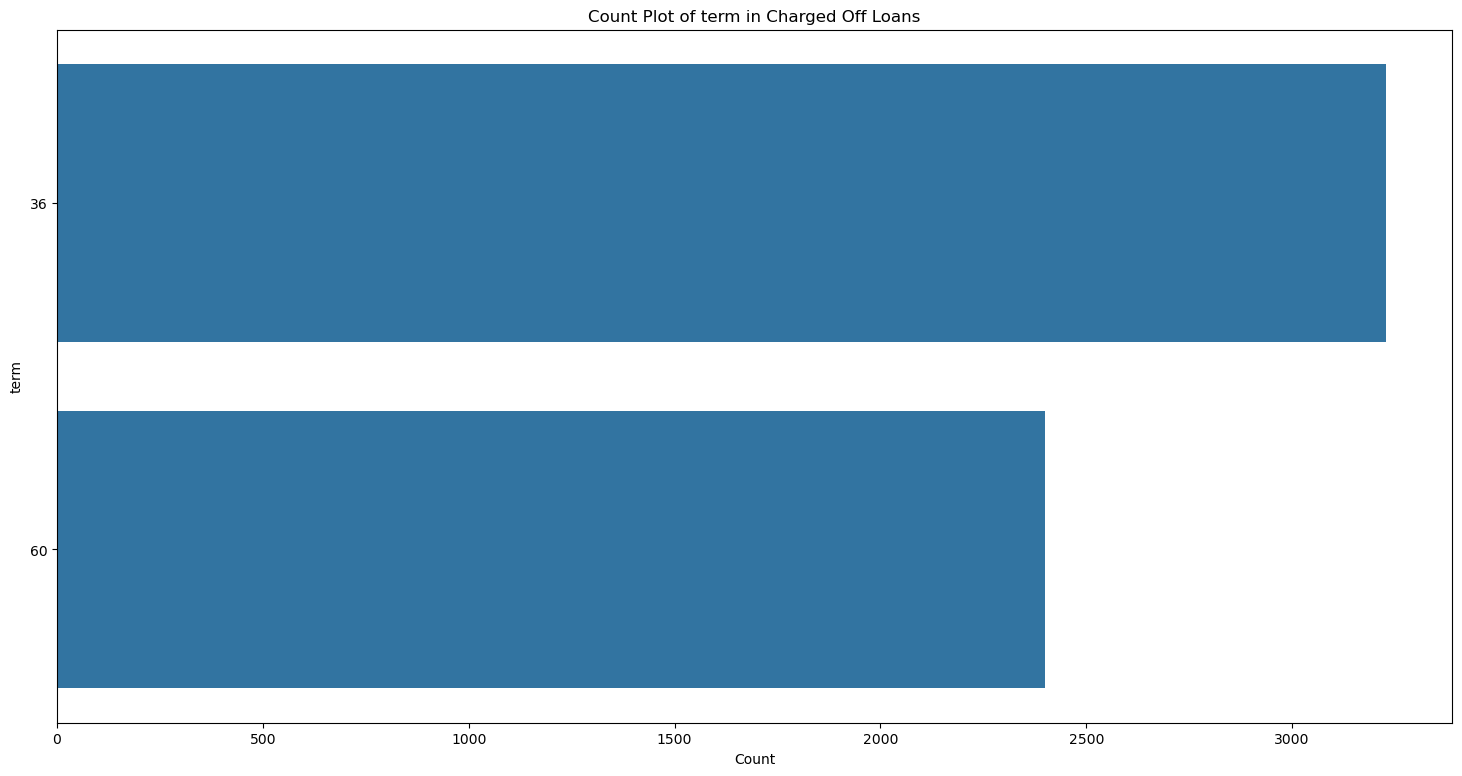

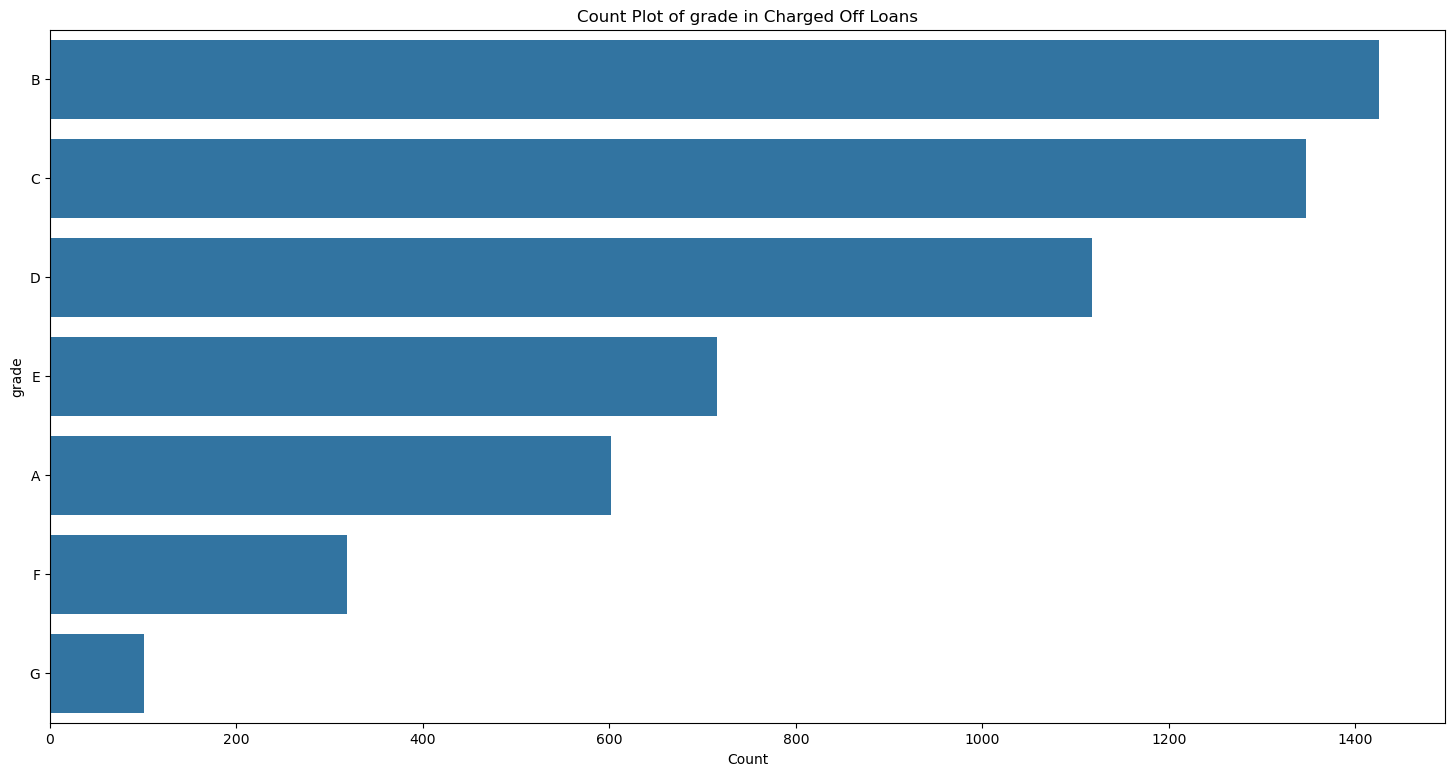

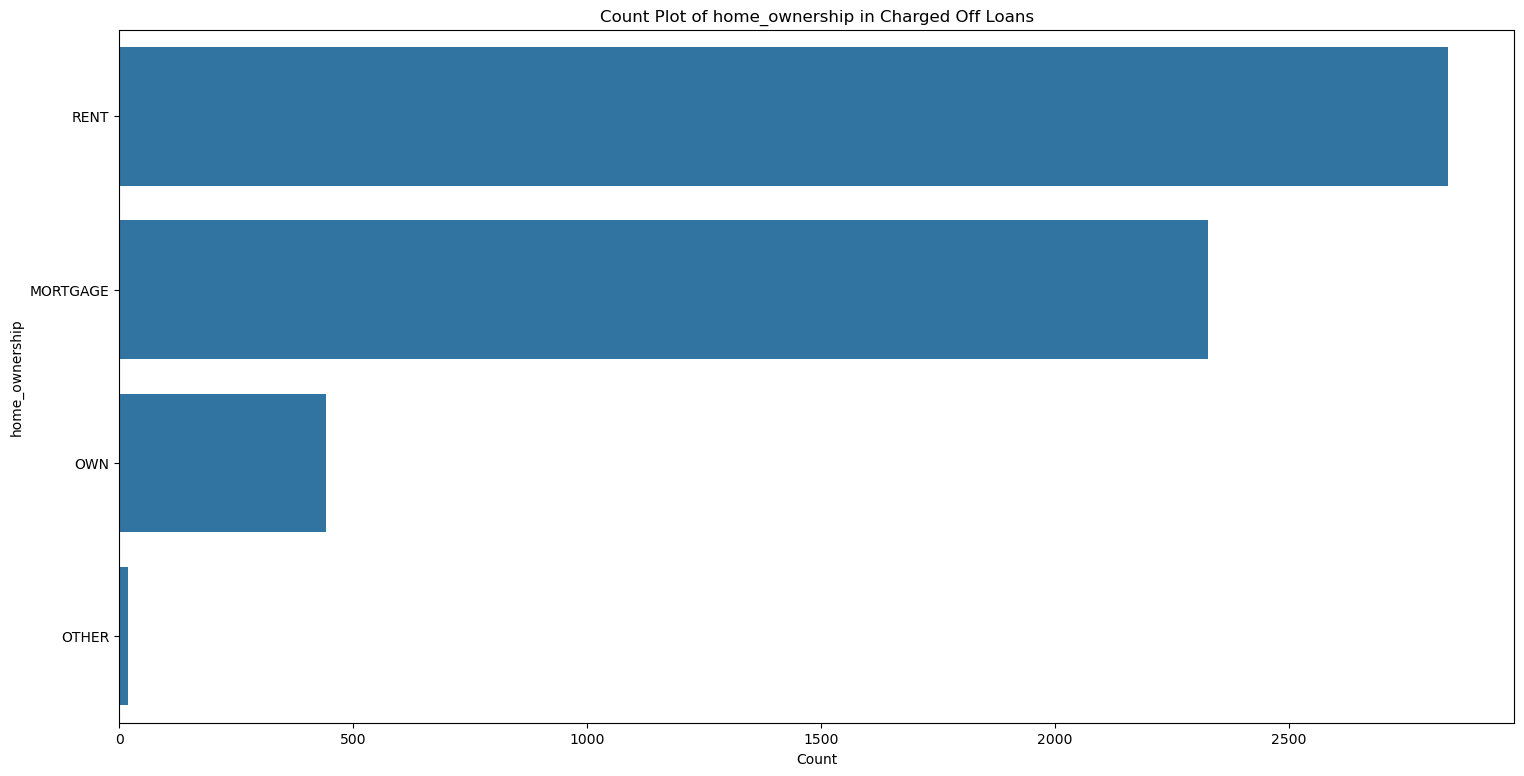

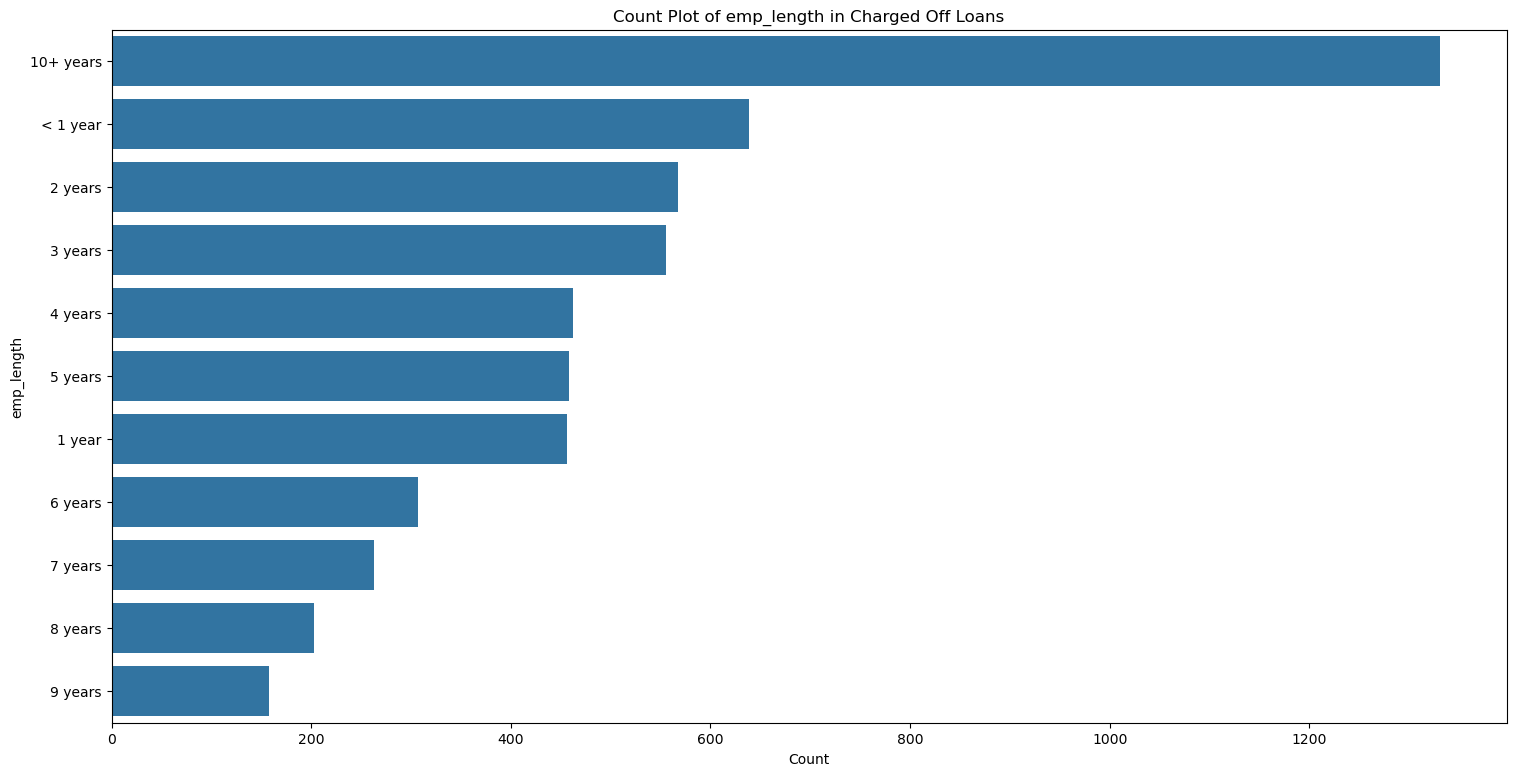

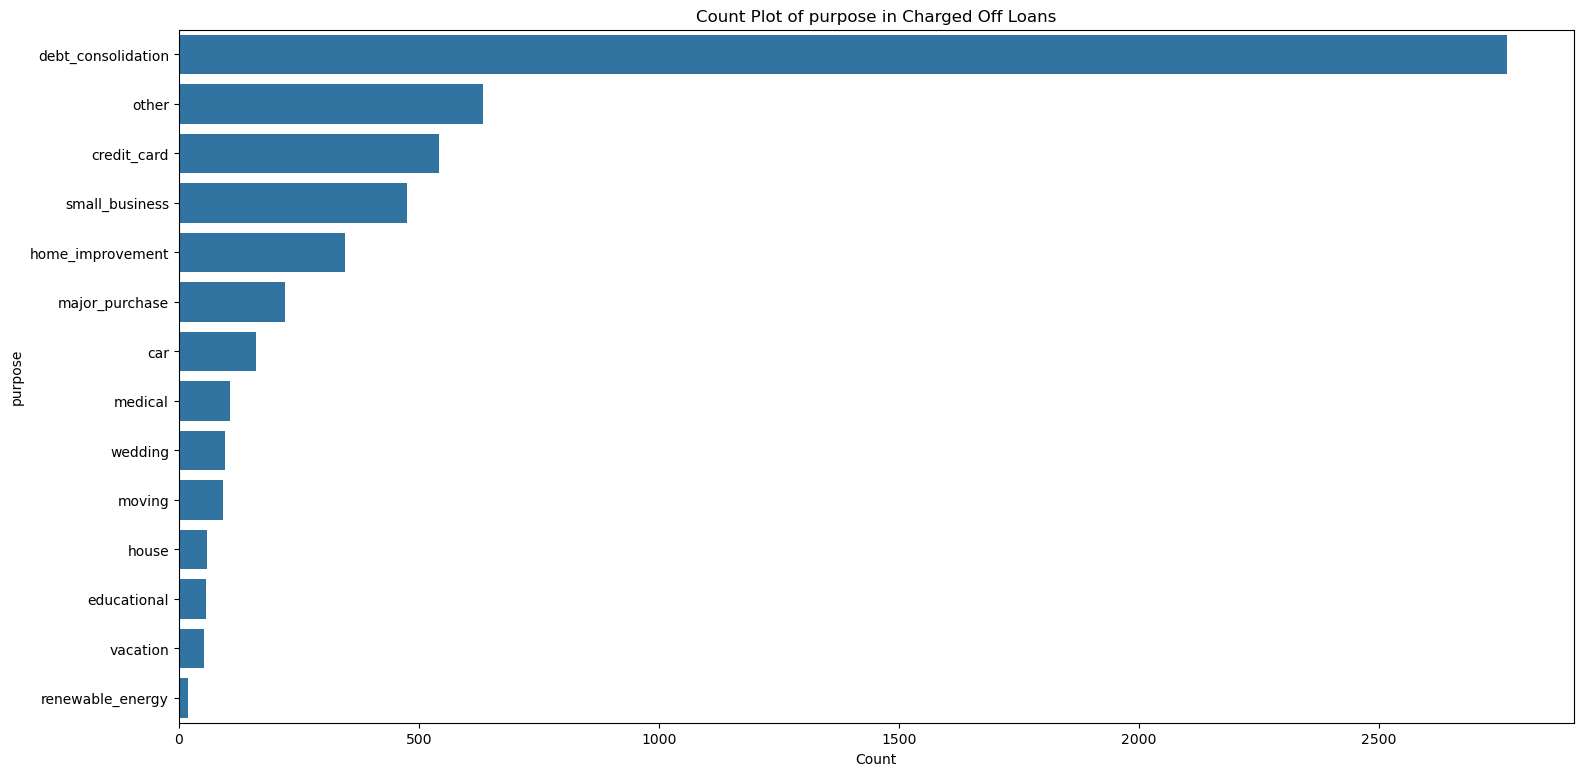

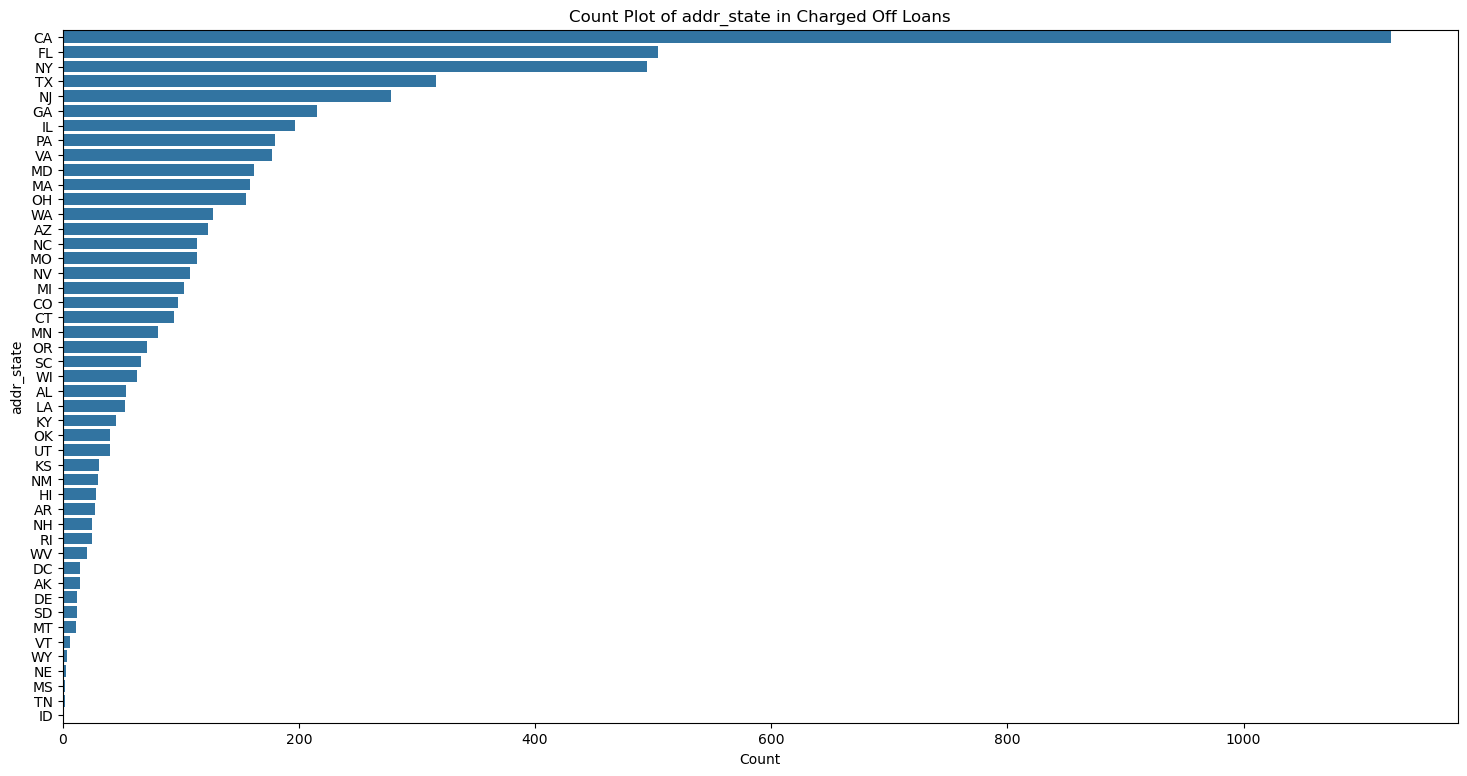

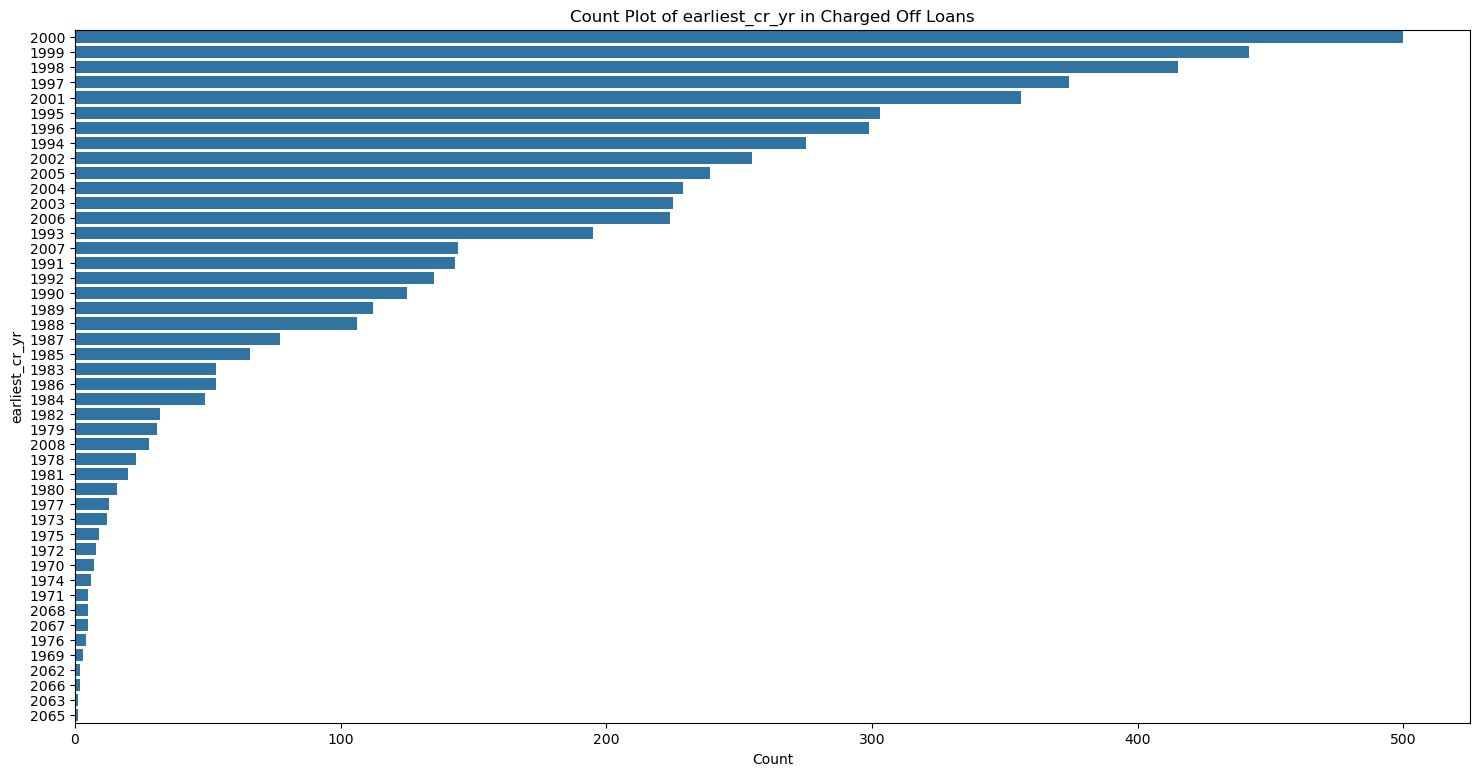

In [37]:
# distibution of values in chargedOffDf for categorical variables
categorical_vars = ['term','grade','sub_grade', 'emp_title','home_ownership', 'emp_length', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line']


# col = 'earliest_cr_yr'
# plt.figure(figsize=(20, 10))
# ax = sns.countplot(y=col, data=chargedOffDf, order=chargedOffDf[col].value_counts().index)
# plt.title(f'Count Plot of {col} in Charged Off Loans')
# plt.xlabel('Count')
# plt.ylabel(col)
# plt.show()

# sns.boxplot(chargedOffDf['earliest_cr_yr'])
# plt.show()




# countplots for categorical variables in chargedOffDf
for col in ['term', 'grade', 'home_ownership', 'emp_length', 'purpose','addr_state','earliest_cr_yr']:
    plt.figure(figsize=(18, 9))
    ax = sns.countplot(y=col, data=chargedOffDf, order=chargedOffDf[col].value_counts().index)
    plt.title(f'Count Plot of {col} in Charged Off Loans')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()



Observations:
1. Most charge offs happen for 36 months term loans
2. Most charge offs happen for grade B, C, D loans
3. Most charge offs happen for sub-grade B5, B3, C1, B4, C2, D2, C3
4. Most charge offs happen for people with rented or mortgaged homes
5. Signifcantly high charge offs by people having more than 10 years of experience followed by 0-4 years of experience
6. No significant pattern found for verification status
7. significantly high charge offs for purpose debt_consolidation followed by otherm credit_card, home_improvement, major_purchase
8. significantly high charge offs from CA followed by FL, NY, TX
9. Most charge offs happen for people whose credit history started in 1995-2000, with peak around 1998-2000 (most in 2000, then 1999, then 1998)

<Axes: ylabel='perc'>

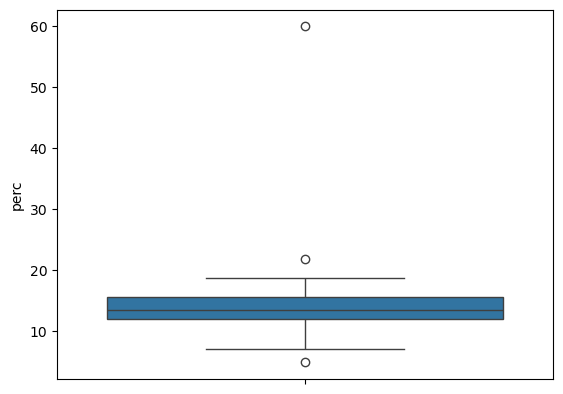

In [38]:

quant_params = ['loan_amnt','term','int_rate','installment','annual_inc','dti', 'revol_bal', 'emp_length_int', 'open_acc', 'total_acc', 'revol_util', 'delinq_2yrs']

# col_q = 'dti'
# plt.figure(figsize=(18, 9))
# sns.countplot(y=col_q, data=final_df, order=final_df[col_q].value_counts().head(50).index)
# plt.show()

# plt.figure(figsize=(18, 9))
# sns.countplot(y=col_q, data=chargedOffDf, order=chargedOffDf[col_q].value_counts().head(50).index)
# plt.show()

# sns.boxplot(chargedOffDf[col_q])

#chargedOffDf[(chargedOffDf['grade'] == 'B') | (chargedOffDf['grade'] == 'C') | (chargedOffDf['grade'] == 'D')].groupby('grade')['annual_inc'].describe()
pd.set_option('display.max_rows', 300)
# print(chargedOffDf.groupby('addr_state')['member_id'].size().sort_values(ascending=False))
# print(final_df.groupby('addr_state')['member_id'].size().sort_values(ascending=False))

int_df = pd.DataFrame()
int_df['cs'] = chargedOffDf.groupby('addr_state')['member_id'].count()
int_df['fs'] = final_df.groupby('addr_state')['member_id'].count()

int_df['perc'] = (int_df['cs'] / int_df['fs']) * 100

int_df = int_df.sort_values(by='perc', ascending=False)
#print(int_df)

#print(int_df[int_df['fs'] > 300])

sns.boxplot(int_df['perc'])





loan_status  pub_rec_bankruptcies
Charged Off  0.0                      5141
             1.0                       366
             2.0                         2
Current      0.0                      1101
             1.0                        37
             2.0                         2
Fully Paid   0.0                     31097
             1.0                      1271
             2.0                         3
Name: count, dtype: int64


loan_status
Charged Off    Axes(0.125,0.11;0.775x0.77)
Current        Axes(0.125,0.11;0.775x0.77)
Fully Paid     Axes(0.125,0.11;0.775x0.77)
Name: pub_rec_bankruptcies, dtype: object

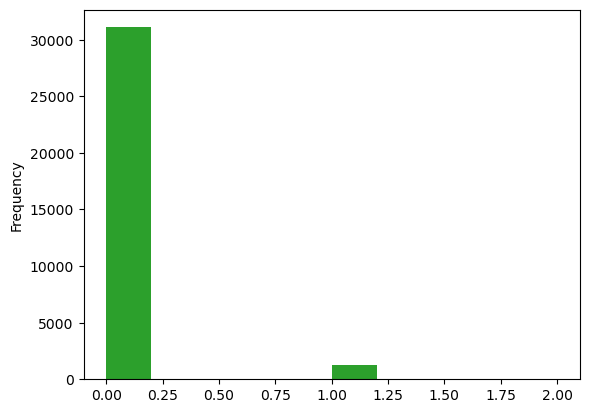

In [ ]:
#Check for non-charged off loans
# find ratio of defaults with respect to delinquency in last 2 years

print(final_df.groupby('loan_status')['pub_rec_bankruptcies'].value_counts())
final_df.groupby('loan_status')['pub_rec_bankruptcies'].plot(kind='hist')

